In [1]:
#Either we can run NN or we can run other algorithms
#import the package
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

#Reading csv file
df1=pd.read_csv(r"STUDENT_DATA14.csv",sep=',', encoding='gbk')
#df1.head()
df1.shape

(14083, 20)

In [32]:
dataset_col_idx = [df1.columns.get_loc(c) for c in df1.columns.values if c in df1]
dataset_col_name = list(df1.columns.values)
print (dataset_col_idx)
print (dataset_col_name)
print(df1.shape)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
['Main Serial No.', 'Sr. No.', 'College Name', 'College Code', 'Merit No', 'Merit Marks', 'Candidate Name', 'Gender', 'Candidate Type', 'Category', 'Home University', 'PH Type', 'Defence Type', 'HSC Eligibility', 'Seat Type', 'Fees Paid', 'CAP Round', 'Admitted/Uploaded Late', 'BRANCH', 'NATIONALITY']
(14083, 20)


In [33]:
#print (df1.info()) # print data types
df= df1.copy(deep=True) # make a copy and keep original dataframe
# remove target column and add at the end
#df_target=df['BRANCH']
#df= df.drop('BRANCH', axis=1)
#df = pd.concat([df,df_target],axis=1)
print(df.isnull().sum()) # count the missing values in each column
#df["BRANCH"].isnull().sum(), df["BRANCH"].unique()


Main Serial No.            2995
Sr. No.                       0
College Name                  0
College Code                  0
Merit No                      0
Merit Marks                   0
Candidate Name                0
Gender                        0
Candidate Type                0
Category                    458
Home University               3
PH Type                   14058
Defence Type              13776
HSC Eligibility               0
Seat Type                     0
Fees Paid                     1
CAP Round                     1
Admitted/Uploaded Late        0
BRANCH                        0
NATIONALITY                   0
dtype: int64


In [34]:
# columns to be dropped which are not relevant to classification / prediction problem
df['HSC Eligibility'] = df['HSC Eligibility'].astype(float)
df['Merit Marks'] = df['Merit Marks'].astype(float)
df.drop(['Main Serial No.','Sr. No.','Candidate Name', 'Fees Paid','Seat Type', 'Admitted/Uploaded Late'], axis=1, inplace=True)
df.columns


Index(['College Name', 'College Code', 'Merit No', 'Merit Marks', 'Gender',
       'Candidate Type', 'Category', 'Home University', 'PH Type',
       'Defence Type', 'HSC Eligibility', 'CAP Round', 'BRANCH',
       'NATIONALITY'],
      dtype='object')

# Preparation & model implementation before pre-processing

In [23]:
#df['Merit No'] = df['Merit No'].apply(np.int64)
#Filling the null value
df["PH Type"]=np.where(pd.isnull(df['PH Type']), 'NA', df['PH Type'])
#df["Defence Type"]=np.where(pd.isnull(df['Defence Type']), 'NA', df['Defence Type'])
df['Category'] = np.where(pd.isnull(df['Category']), 'OPEN', df['Category'])
df['Home University'] = np.where(pd.isnull(df['Home University']), 'PUNE', df['Home University'])
#df['Candidate Type'] = np.where(pd.isnull(df['Candidate Type']), 'NA', df['Candidate Type'])
df['College Name'] = np.where(pd.isnull(df['College Name']), 'SINHGAD SKN, VADGAON', df['College Name'])
df['NATIONALITY'] = np.where(pd.isnull(df['NATIONALITY']), 'INDIAN', df['NATIONALITY'])
df['BRANCH'] = np.where(pd.isnull(df['BRANCH']), 'COMPUTER', df['BRANCH'])
df['Defence Type'] = np.where(pd.isnull(df['Defence Type']), 'NA', df['Defence Type'])
df['Gender'] = np.where(pd.isnull(df['Gender']), 'M', df['Gender'])
df['HSC Eligibility'] = np.where(pd.isnull(df['HSC Eligibility']), 50, df['HSC Eligibility'])
df['CAP Round'] = np.where(pd.isnull(df['CAP Round']), 'ROUND-1', df['CAP Round'])
#df['Seat Type'] = np.where(pd.isnull(df['Seat Type']), 'GOPEN', df['Seat Type'])
df['Candidate Type'] = np.where(pd.isnull(df['Candidate Type']), 'TYPE A', df['Candidate Type'])
df['College Code'] = np.where(pd.isnull(df['College Code']), 6178, df['College Code'])
df['Merit No'] = np.where(pd.isnull(df['Merit No']), 67390, df['Merit No'])
df['Merit Marks'] = np.where(pd.isnull(df['Merit Marks']), 50, df['Merit Marks'])
print(df.isnull().sum())

College Name       0
College Code       0
Merit No           0
Merit Marks        0
Gender             0
Candidate Type     0
Category           0
Home University    0
PH Type            0
Defence Type       0
HSC Eligibility    0
CAP Round          0
BRANCH             0
NATIONALITY        0
dtype: int64


In [24]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
# Encode labels in column 'in all'. 
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Category']= label_encoder.fit_transform(df['Category'])
df['Candidate Type']= label_encoder.fit_transform(df['Candidate Type'])
df['College Name']=label_encoder.fit_transform(df['College Name'])
df['NATIONALITY']=label_encoder.fit_transform(df['NATIONALITY'])
df['Defence Type']=label_encoder.fit_transform(df['Defence Type'])
df['CAP Round']=label_encoder.fit_transform(df['CAP Round'])
df['PH Type']= label_encoder.fit_transform(df['PH Type'])
df['BRANCH'] = label_encoder.fit_transform(df['BRANCH'])
df['temp_y'] = df['BRANCH']
df['Home University']= label_encoder.fit_transform(df['Home University'])
df['College Code']= label_encoder.fit_transform(df['College Code'])

In [25]:
df_col_idx = [df.columns.get_loc(c) for c in df.columns.values if c in df]
df_col_name = list(df.columns.values)
df.drop(['BRANCH'], axis=1, inplace=True)


In [26]:
X=df.iloc[:,:len(df_col_idx)-1]    # predictors
y = df['temp_y']     # target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2019)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LR: 0.230057 (0.021124)
SVM: 0.194338 (0.015037)
DTreeC: 1.000000 (0.000000)
RF: 0.983233 (0.004926)
NB: 0.123904 (0.024903)
KNN: 0.225476 (0.014931)


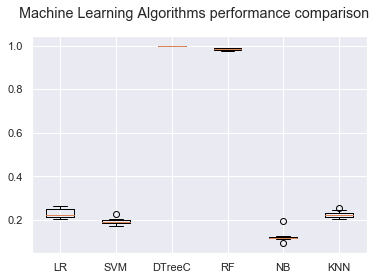

In [113]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
models_list = []

models_list.append(('LR', LogisticRegression(max_iter=1000)))
models_list.append(('SVM', SVC()))
models_list.append(('DTreeC', DecisionTreeClassifier()))
models_list.append(('RF', RandomForestClassifier(n_estimators=300, max_features=3)))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

results = []
algo_names = []

for name, model in models_list:
    kfold = KFold(n_splits=10, random_state=2019)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cross_val_results)
    algo_names.append(name)
    info = "%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(info)

fig = plt.figure()
fig.suptitle('Machine Learning Algorithms performance comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algo_names)
plt.show()

# DATA Pre-processing & EDA

In [35]:
def data_summary(df):
    print ('\nColumn - Data Types: ', df.info())
    print ('\nDescriptive Statistics including NaN: ', df.describe())
    print('\nCount of NaN in each feature: ', df.isnull().sum()) 
    
#    print('\nTotal Students: ', df['Candidate Name'].count())
    print('\nTotal No of Colleges(College Code):\n ', df['College Code'].value_counts())
    print('\nTotal No of Colleges(College Name):\n ', df['College Name'].value_counts())
    
#    print('\nTotal Branches: ', df['BRANCH'].value_counts())
    print('\nTotal  Students: ', df['Merit Marks'].count())
    print('\nStudent count by College: ')
#    print(df['BRANCH'].value_counts())
    print(df['College Name'].value_counts(normalize=True))


In [36]:
data_summary(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14083 entries, 0 to 14082
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   College Name     14083 non-null  object 
 1   College Code     14083 non-null  int64  
 2   Merit No         14083 non-null  float64
 3   Merit Marks      14083 non-null  float64
 4   Gender           14083 non-null  object 
 5   Candidate Type   14083 non-null  object 
 6   Category         13625 non-null  object 
 7   Home University  14080 non-null  object 
 8   PH Type          25 non-null     object 
 9   Defence Type     307 non-null    object 
 10  HSC Eligibility  14083 non-null  float64
 11  CAP Round        14082 non-null  object 
 12  BRANCH           14083 non-null  object 
 13  NATIONALITY      14083 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.5+ MB

Column - Data Types:  None

Descriptive Statistics including NaN:         College Code     

In [37]:
df['HSC Eligibility'] = df['HSC Eligibility'].astype(float)
df['Merit Marks'] = df['Merit Marks'].astype(float)
def preprocess_data(df):
    #df['Diploma Percentage'] = np.where(pd.isnull(df['Diploma Percentage']), df['HSC Percentage'], df['Diploma Percentage'])
    df2=pd.read_csv(r"STUDENT_DATA14.csv",usecols=["Merit Marks"])
    for Marks in range(len(df2)):
        if(df2.iloc[Marks,0])>1000000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/100000
        if(df2.iloc[Marks,0])>100000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10000
        elif(df2.iloc[Marks,0])>10000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/1000
        elif(df2.iloc[Marks,0])>1000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/100
        elif(df2.iloc[Marks,0])>100:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10
    df["Merit Marks"]=df2["Merit Marks"]
    print('\nMax Merit Marks: ',df['Merit Marks'].max())
    df2=pd.read_csv(r"STUDENT_DATA14.csv",usecols=["HSC Eligibility"])
    for Marks in range(len(df2)):
        if(df2.iloc[Marks,0])>100000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10000
        elif(df2.iloc[Marks,0])>10000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/1000
        elif(df2.iloc[Marks,0])>1000:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/100
        elif(df2.iloc[Marks,0])>100:
            (df2.iloc[Marks,0])=(df2.iloc[Marks,0])/10
    df["HSC Eligibility"]=df2["HSC Eligibility"]
    print('\nMax HSC Eligibility: ',df["HSC Eligibility"].max())
    df['Defence Type'].replace('DEF-3', 'DEF3', inplace=True)
    df['Defence Type'].replace('DEF 2', 'DEF2', inplace=True)
    df['Defence Type'].replace('DEF 3', 'DEF3', inplace=True)
    df['Defence Type'].replace('DEF 1', 'DEF1', inplace=True)
    df['Defence Type'].replace('DEF-1', 'DEF1', inplace=True)
    df['Defence Type'].replace('DEF-3', 'DEF3', inplace=True)
    
    df['Category'].replace('OPEN ', 'OPEN', inplace=True)
    
    df['College Name'].replace('PVG CET, PUNE', 'PVG CET', inplace=True)
    df['College Name'].replace('DY PATIL AKURDI', 'DY PATIL AK', inplace=True)
    df['College Name'].replace('PICT, PUNE', 'PICT', inplace=True)
    df['College Name'].replace('MMMIT, LOHGAON, PUNE', 'MMMIT, LOH', inplace=True)
    df['College Name'].replace('KJCOEMR, PISOLI', 'KJCOEMR', inplace=True)
    df['College Name'].replace('KJ TRINITY COER', 'KJ TRINITY', inplace=True)
    df['College Name'].replace('SINHGAD KONDHWA (BK)', 'SINHGAD KONDHWA', inplace=True)
    df['College Name'].replace('INDIRA COEM, PUNE', 'INDIRA COEM', inplace=True)
    df['College Name'].replace('SINHGAD SKN, VADGAON', 'SINHGAD SKN', inplace=True)
    df['College Name'].replace('PES MODERN COE, PUNE', 'PES MODERN', inplace=True)
    df['College Name'].replace('TSSM PVPIT, BAVDHAN', 'PVPIT, BAVDHAN', inplace=True)
    df['College Name'].replace('SINHGAD ACADEMY, KONDHWA', 'SINHGAD ACAD, KONDHWA', inplace=True)
    df['College Name'].replace('PIMPRI CHINCHWAD COLLEGE OF ENGG AND RESEARCH', 'PCCOEAR', inplace=True)
    df['College Name'].replace('PIMPRI\xa0CHINCHWAD\xa0COLLEGE OF\xa0ENGG\xa0AND\xa0RESEARCH', 'PCCOEAR', inplace=True)
    df['College Name'].replace('SC0E, VADGAON', 'SCOE, VADGAON', inplace=True)
    df['College Name'].replace('PIMPRI CHINCHWAD COLLEGE OF ENGINEERING', 'PCCOE', inplace=True)
    df['College Name'].replace('MAEERS M.I.T COLLEGE OF ENGINEERING', 'M.I.T COE', inplace=True)
    df['College Name'].replace('DY PATIL IET,PIMPRI', 'DY PATIL,PIMPRI', inplace=True)
    df['College Name'].replace('MMCOE, KARVENAGAR, PUNE', 'MMCOE,PUNE', inplace=True)

    df['Home University'].replace('S.R.T.M.U', 'S.R.T.M.U.', inplace=True)
    df['Home University'].replace('SRTMU', 'S.R.T.M.U.', inplace=True)
    df['Home University'].replace('B.A.M.U', 'B.A.M.U.', inplace=True)
    df['Home University'].replace('BAMU', 'B.A.M.U.', inplace=True)
    df['Home University'].replace('GONDWANE', 'GONDWANA', inplace=True)
    df['Home University'].replace('PUME', 'PUNE', inplace=True)
    df['Home University'].replace('M', 'MUMBAI', inplace=True) 
    df['Home University'].replace('OHU ', 'OHU', inplace=True)  
    df['Home University'].replace('0', 'OHU', inplace=True)
    df['Home University'].replace(' SHIVAJI ', 'SHIVAJI', inplace=True)
    df['Home University'].replace('SH', 'SHIVAJI', inplace=True)
    df['Home University'].replace('AMRAVATI ', 'AMRAVATI', inplace=True)
    df['Home University'].replace('SO', 'SOLAPUR', inplace=True)
    df['Home University'].replace('A', 'SOLAPUR', inplace=True)
    df['Home University'].replace('NAGAPUR', 'NAGPUR', inplace=True)
    df['Home University'].replace('NORTH MAHATRASHTRA', 'NORTH MAHARASHTRA', inplace=True)
    
    df['Category'].replace('O', 'OPEN', inplace=True)
    df['Category'].replace('PO', 'OPEN', inplace=True)
    df['Category'].replace('OBC ', 'OBC', inplace=True)
    df['Category'].replace('SCS', 'SC', inplace=True)
    df['Category'].replace('ST ', 'ST', inplace=True)
    df['Category'].replace('O', 'OPEN', inplace=True)
    df['Category'].replace('NY-C', 'NT-C', inplace=True)
    df['Category'].replace('NY-D', 'NT-D', inplace=True)
    df['Category'].replace('NT', 'NT-D', inplace=True)
    df['Category'].replace('NT--B', 'NT-B', inplace=True)
    df['Category'].replace('NA ', 'NT-D', inplace=True)
    df['Category'].replace('NT-D ', 'NT-D', inplace=True)
    df['Category'].replace('OMS', 'OBC', inplace=True)
    
    df['BRANCH'].replace('ELECTRONIC AND TELECOMMUNICATION ENG.', 'ENTC', inplace=True)
    df['BRANCH'].replace('INFORMATION TECHNOLOGY', 'IT', inplace=True)
    df['BRANCH'].replace('ELECTRONIC AND TELECOMMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELECOMMUNICATION ENG.', 'ENTC', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELECOMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELCOMMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('PRODUCTION ENGINEERING', 'PRODUCTION', inplace=True)
    df['BRANCH'].replace('COMPUTER ENGINEERING', 'COMPUTER', inplace=True)
    df['BRANCH'].replace('COMPUTER  ENGINEERING', 'COMPUTER', inplace=True)    
    df['BRANCH'].replace('CIVIL ENGINEERING', 'CIVIL', inplace=True)
    df['BRANCH'].replace('MECHANICAL ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('MECHANICAL  ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('MACHANICAL  ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('ELECTRIC ENGINEERING', 'ELECTRICAL', inplace=True)
    df['BRANCH'].replace('ELECTRICAL ENGINEERING', 'ELECTRICAL', inplace=True)
    df['BRANCH'].replace('ELECTRONIC', 'ELECTRONICS', inplace=True)
    df['BRANCH'].replace('AUTOMOBILE ENG.', 'AUTOMOBILE', inplace=True)
    df['BRANCH'].replace('POLYMER ENGINEERING', 'POLYMER', inplace=True)
    df['BRANCH'].replace('PETRO CHEMICAL ENGINNEERING', 'PETRO CHEMICAL', inplace=True)
    df['BRANCH'].replace('MECHANICAL ENGINEERING', 'MECHANICAL', inplace=True)
    df['BRANCH'].replace('PETROLEUM ENGINEERING', 'PETROLEUM', inplace=True)
    df['BRANCH'].replace('AUTOMOBILE ENG.', 'AUTOMOBILE', inplace=True)
    df['BRANCH'].replace('POLYMER ENGINEERING', 'POLYMER', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELECOMMUNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('MECHANICAL ENGINEERING [SANDWICH]', 'MECHANICAL[SANDWICH]', inplace=True)
    df['BRANCH'].replace('ELECTRONICS AND TELTCOMMNICATION ENGG', 'ENTC', inplace=True)
    df['BRANCH'].replace('INSTRUMENTATION  ENGINEERING', 'INSTRUMENTATION', inplace=True)
    df['BRANCH'].replace('INSTRUMENTAION ENGINEERING', 'INSTRUMENTATION', inplace=True)
                         
    df['Candidate Type'].replace('TYPE  A', 'TYPE A', inplace=True)
    df['Candidate Type'].replace('TYPE A ',  'TYPE A', inplace=True)
    df['Candidate Type'].replace('TYPE  B', 'TYPE B', inplace=True)
    df['Candidate Type'].replace('TYPE B ', 'TYPE B', inplace=True)
    df['Candidate Type'].replace('TYPE  C', 'TYPE C', inplace=True)
    df['Candidate Type'].replace('MAHARASHTRA TYPE E', 'TYPE E', inplace=True)
    df['Candidate Type'].replace('TYPEC', 'TYPE C', inplace=True)
    df['Candidate Type'].replace('J & K', 'J&K', inplace=True)
    df['Candidate Type'].replace('TYPE ', 'TYPE E', inplace=True)
    df['Candidate Type'].replace('J&K SPECIAL SCHOLARSHIP SCHEME CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J&K SPECIAL SCHOLARSHIP SCHEME', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('JKSSS', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('JKSSS', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J & K SPECIAL SCHOLARSHIP SCHEME CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J & K SPECIAL SCHOLORSHIP SCHEME CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('J&K SPECIAL SCHOLARSHIP CANDIDATE', 'J&K SSSC', inplace=True)
    df['Candidate Type'].replace('TYEP A', 'TYPE A', inplace=True)
    df['Candidate Type'].replace('TYPEA', 'TYPE A', inplace=True)
    df['Candidate Type'].replace('GoI', 'PIO', inplace=True)
    df['Candidate Type'].replace('OMS ', 'OMS', inplace=True)

    df['CAP Round'].replace('ROUND 1', 'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUND 2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUND 3', 'ROUND-3', inplace=True)
    df['CAP Round'].replace('ROUND 4', 'ROUND-4', inplace=True)
    df['CAP Round'].replace('ROUND 5', 'ROUND-5', inplace=True)
    df['CAP Round'].replace('ROIND 1', 'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUND 6', 'ROUND-6', inplace=True)
    df['CAP Round'].replace('ROUND 7',  'ROUND-7', inplace=True)
    df['CAP Round'].replace('ROUND 8', 'ROUND-8', inplace=True)
    df['CAP Round'].replace('ROUND 9', 'ROUND-9', inplace=True)
    df['CAP Round'].replace('ROUND 10', 'ROUND-10', inplace=True)
    df['CAP Round'].replace('ROIND 11', 'ROUND-11', inplace=True)
    df['CAP Round'].replace('ROUND 11', 'ROUND-11', inplace=True)
    df['CAP Round'].replace('ROUND 12', 'ROUND-12', inplace=True)
    df['CAP Round'].replace('ROUND 13',  'ROUND-13', inplace=True)
    df['CAP Round'].replace('ROUND 14', 'ROUND-14', inplace=True)
    df['CAP Round'].replace('  INSTITUTE LEVEL', 'IL', inplace=True)
    df['CAP Round'].replace('INSITITUT LEVEL', 'IL', inplace=True)
    df['CAP Round'].replace('INSTITUTE LEVEL', 'IL', inplace=True)
    df['CAP Round'].replace('COUNSELING ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('COUNSELING ROUND ',  'CR', inplace=True)
    df['CAP Round'].replace('COUNSELLING ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('COUNSLING ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('COUNSELING  ROUND', 'CR', inplace=True)
    df['CAP Round'].replace('J & K COUNSELING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J & K COUNSELING ', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J &K COUNSELLING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J & K COUNSINGH', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J&K COUNCILING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('J & K COUNSELLING', 'J&K COUNSELING', inplace=True)
    df['CAP Round'].replace('RANUD 2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('RANUD2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUND 2 ',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('RUNND-2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUND2',  'ROUND-2', inplace=True)
    df['CAP Round'].replace('ROUN  1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUN  1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace('ROUND -1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace(' ROUND-1',  'ROUND-1', inplace=True)
    df['CAP Round'].replace('0',  'ROUND-0', inplace=True)
    df['CAP Round'].replace('`',  'ROUND-1', inplace=True)

                                     
    df['Gender'].replace('m', 'M', inplace=True)
    df['Gender'].replace('MM', 'M', inplace=True)
    df['Gender'].replace('MF', 'M', inplace=True)
                         
    df['NATIONALITY'].replace('J & K', 'J&K', inplace=True)
                         

    #Filling the null value
    df["PH Type"]=np.where(pd.isnull(df['PH Type']), 'NA', df['PH Type'])
    df["Defence Type"]=np.where(pd.isnull(df['Defence Type']), 'NA', df['Defence Type'])
    df['Category'] = np.where(pd.isnull(df['Category']), 'OPEN', df['Category'])
    df['Home University'] = np.where(pd.isnull(df['Home University']), 'NA', df['Home University'])
    #df['Gender'] = np.where(pd.isnull(df['Gender']), '0', df['Gender'])
    df['HSC Eligibility'] = np.where(pd.isnull(df['HSC Eligibility']), '0', df['HSC Eligibility'])
    df['CAP Round'] = np.where(pd.isnull(df['CAP Round']), 'NA', df['CAP Round'])
    
          
    return df

In [38]:
df = preprocess_data(df)


Max Merit Marks:  100.0

Max HSC Eligibility:  99.44


In [39]:
def get_min_max_stats(group):
    return {'min': group.min(), 'max': group.max(),  'mean': group.mean()}

bins = [0, 35, 50, 60, 75, 100]
group_names = ['Fail', 'Pass Class', 'Second Class', 'First Class', 'Distinction']

def get_HSC_binned(df):
    df['HSC_binned'] = pd.cut(df['HSC Eligibility'], bins, labels=group_names)
    print('\n',df['HSC Eligibility'].groupby(df['HSC_binned']).apply(get_min_max_stats).unstack())
    df['HSC Eligibility'].groupby(df['HSC_binned']).apply(get_min_max_stats).unstack().plot(kind='bar')
    pd_ct = pd.crosstab([df['College Name']],df['HSC_binned'],margins=True)
    print('\n',pd_ct)
    pd_ct.plot(kind='bar',title='College Name-HSC Marks wise group')

def get_Merit_Marks_binned(df):
    df['Merit_Marks_binned'] = pd.cut(df['Merit Marks'], bins, labels=group_names)
    print('\n',df['Merit Marks'].groupby(df['Merit_Marks_binned']).apply(get_min_max_stats).unstack())
    df['Merit Marks'].groupby(df['Merit_Marks_binned']).apply(get_min_max_stats).unstack().plot(kind='bar')
    pd_ct = pd.crosstab([df['College Name']],df['Merit_Marks_binned'],margins=True)
    print('\n',pd_ct)
    pd_ct.plot(kind='bar',title='College Name-Merit_Marks wise group')


                 min    max       mean
HSC_binned                           
Fail            NaN    NaN        NaN
Pass Class    43.67  50.00  47.731765
Second Class  50.17  60.00  55.336772
First Class   60.17  75.00  67.532667
Distinction   75.11  99.44  83.841127

 HSC_binned                                Pass Class  Second Class  \
College Name                                                         
AISSMS,Pune                                       81           310   
BVCE, KATRAJ                                      13            50   
DR DYPC                                           42           105   
DR DYPC1                                          21            78   
DY PATIL AK                                       48           198   
DY PATIL,PIMPRI                                   40           214   
INDIRA COEM                                       36           113   
JSPM RSCOE                                        51           160   
KJ TRINITY                    

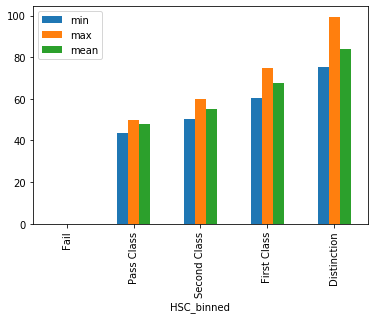

C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29147 missing from cur

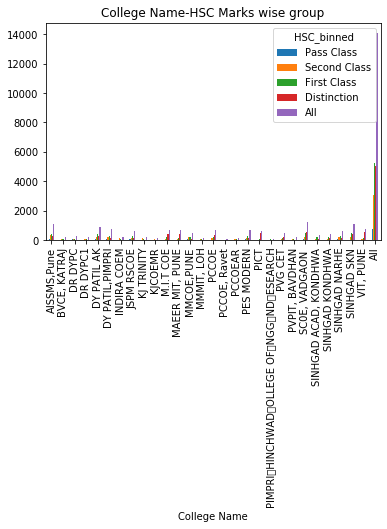

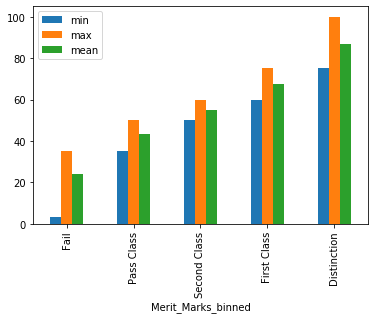

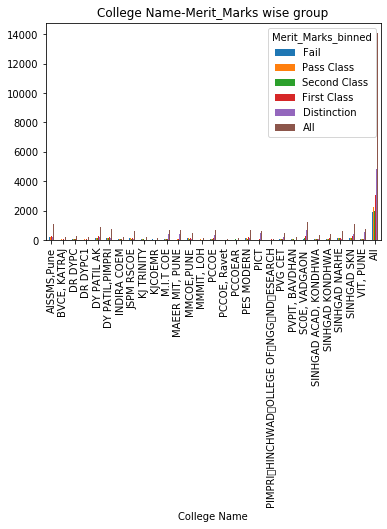

In [40]:
df['HSC Eligibility'] = df['HSC Eligibility'].astype(float)
get_HSC_binned(df)
get_Merit_Marks_binned(df)

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['BRANCH'] = np.where(pd.isnull(df['BRANCH']), 'COMPUTER', df['BRANCH'])
df['BRANCH']= label_encoder.fit_transform(df['BRANCH'])
branch_names = label_encoder.classes_
df['temp_y'] =df['BRANCH']
branch_names


array(['AUTOMOBILE', 'BIO TECHNOLOGY', 'CHEMICAL', 'CIVIL', 'COMPUTER',
       'ELECTRICAL', 'ELECTRONICS', 'ENTC', 'INDUSTRIAL',
       'INSTRUMENTATION', 'IT', 'MECH (SANDWICH)', 'MECHANICAL',
       'MECHANICAL[SANDWICH]', 'PETRO CHEMICAL', 'PETROLEUM', 'POLYMER',
       'PRINTING', 'PRODUCTION', 'PRODUCTION (SANDWICH)'], dtype=object)

In [ ]:
def EDA_After_PP(df):
     
        
    print('\n # of Students by College and Branch: ')
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set(style="darkgrid")
    chart=sns.countplot(x = "BRANCH", hue="College Name" ,data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

    
    pd_ct = pd.crosstab([df['BRANCH']],df['Gender'],margins=True)
    print('\n',pd_ct)
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set(style="darkgrid")
    chart=sns.countplot(x = "BRANCH", hue="Gender" ,data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set(style="darkgrid")
    chart=sns.countplot(x = "BRANCH", hue="Home University" ,data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
           
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set(style="darkgrid")
    chart=sns.countplot(x = "BRANCH", hue="Category" ,data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set(style="darkgrid")
    chart=sns.countplot(x = "BRANCH", hue="HSC_binned" ,data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    
    fig, ax = plt.subplots(figsize=(20,10))
    sns.set(style="darkgrid")
    chart=sns.countplot(x = "BRANCH", hue="Merit_Marks_binned" ,data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    
   
    plt.figure(figsize = (16,10))
    chart=sns.boxplot( x = 'BRANCH', y = 'HSC Eligibility', data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    
    plt.figure(figsize = (16,10))
    chart=sns.boxplot( x = 'BRANCH', y = 'Merit Marks', data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    
    return df


 # of Students by College and Branch: 

 Gender     F      M    All
BRANCH                    
0          0     30     30
1         37     26     63
2         49    139    188
3        207   1289   1496
4       1073   2000   3073
5         96    377    473
6         26     92    118
7        905   1811   2716
8          5     38     43
9         37    140    177
10       547    981   1528
11         7     79     86
12       427   3193   3620
13         7     26     33
14         2     37     39
15         6     57     63
16        10     53     63
17        10     38     48
18        12     93    105
19         9    112    121
All     3472  10611  14083


C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29147 missing from cur

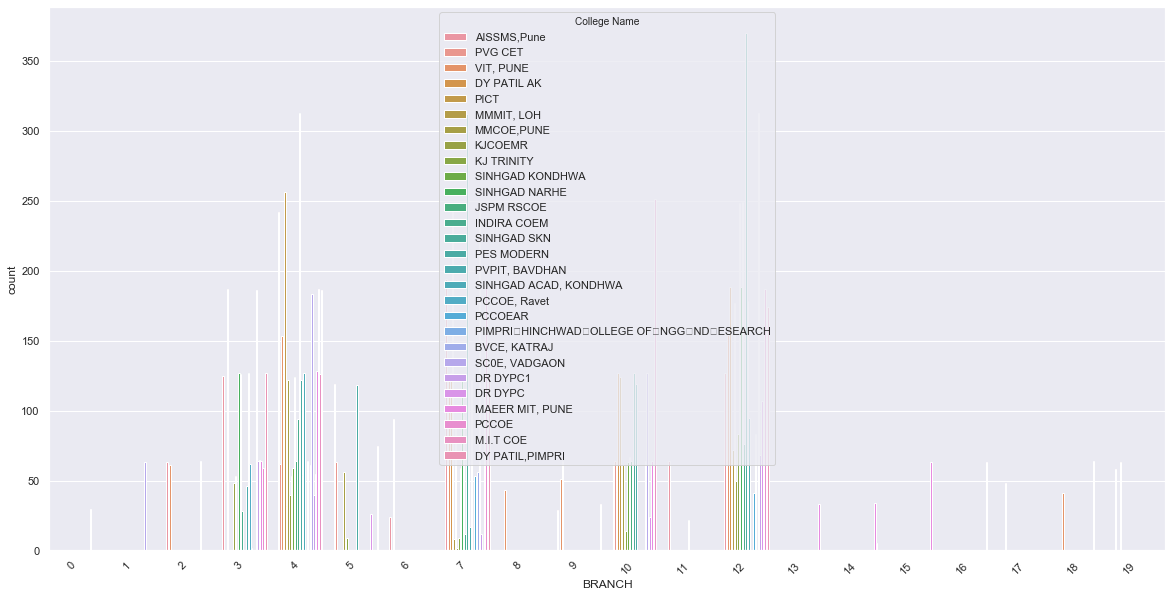

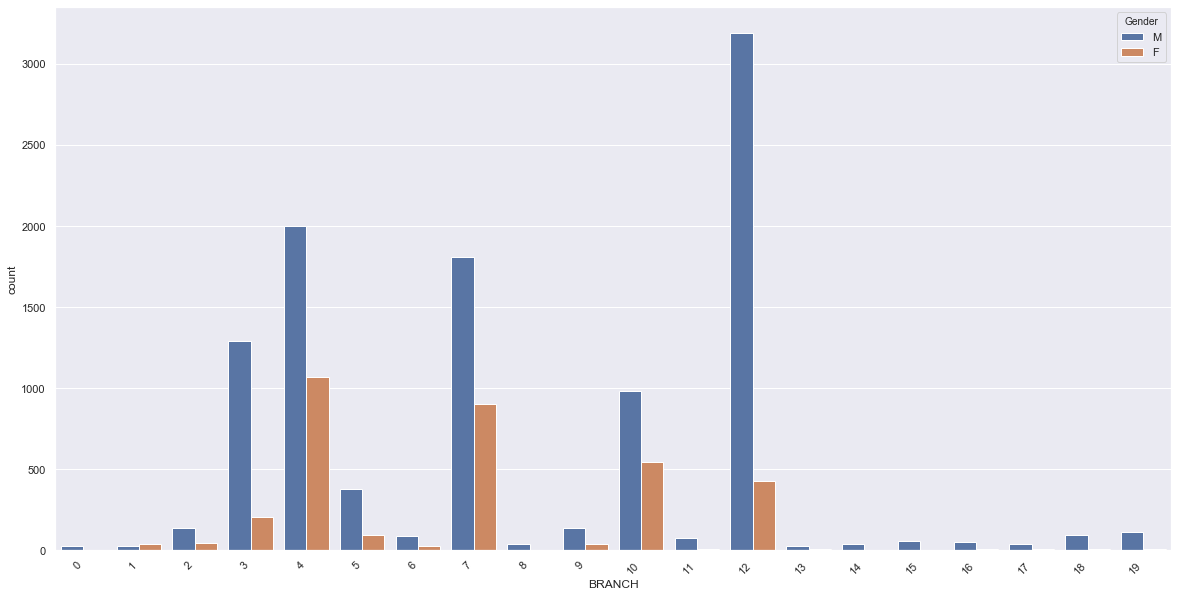

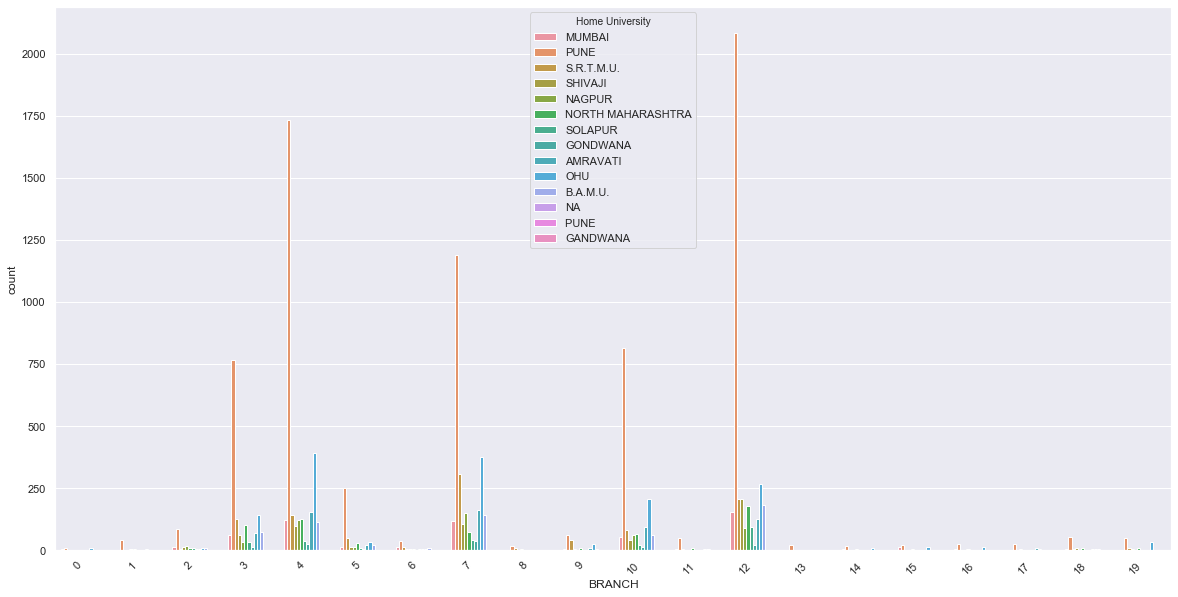

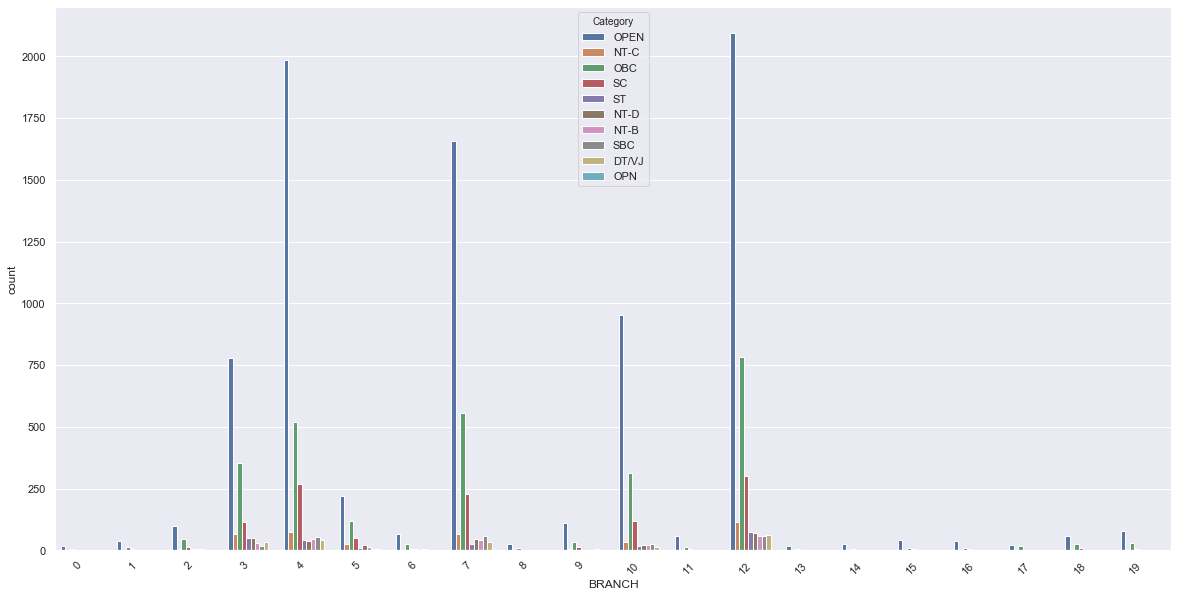

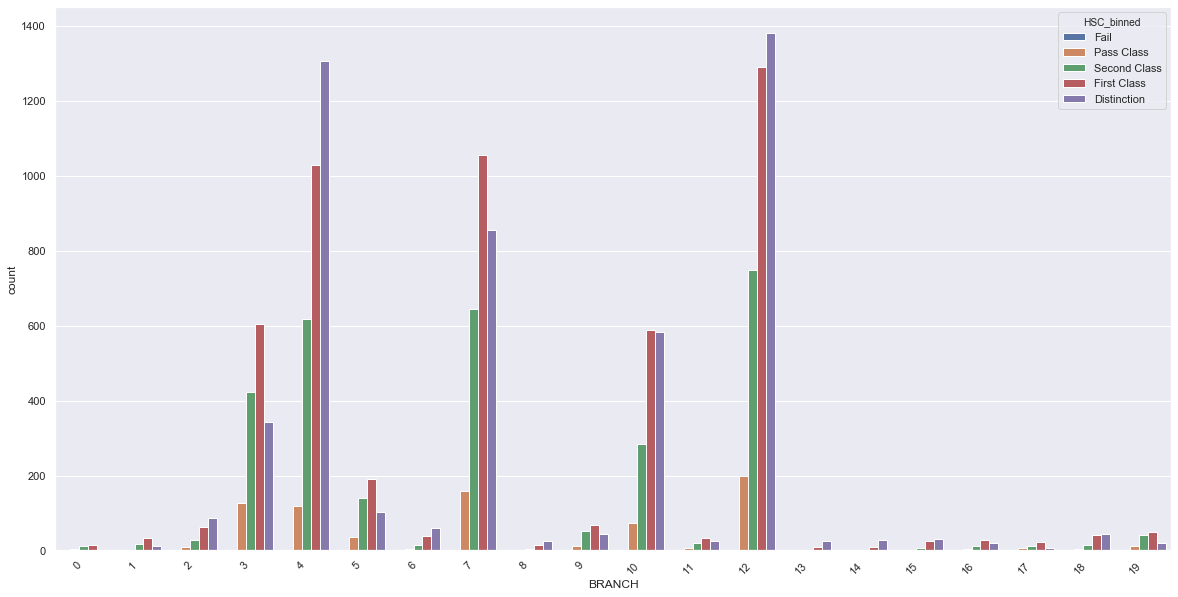

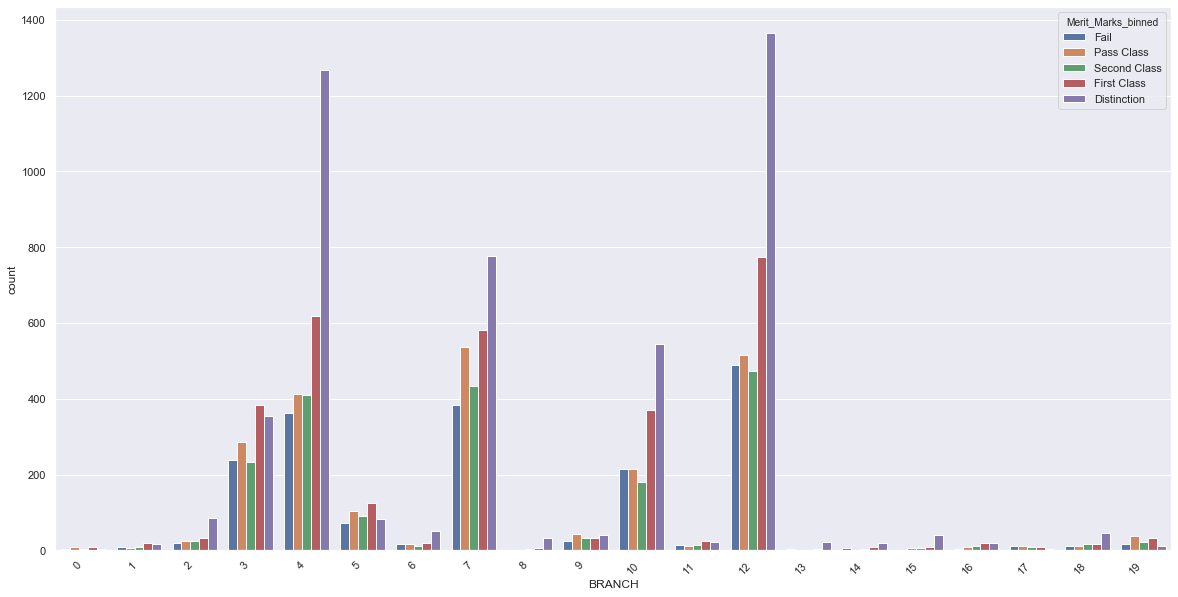

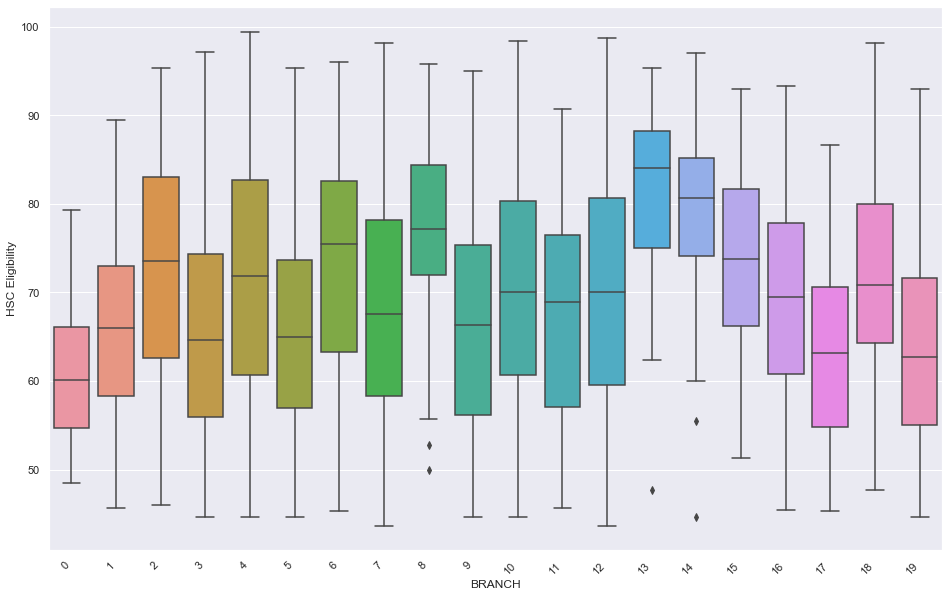

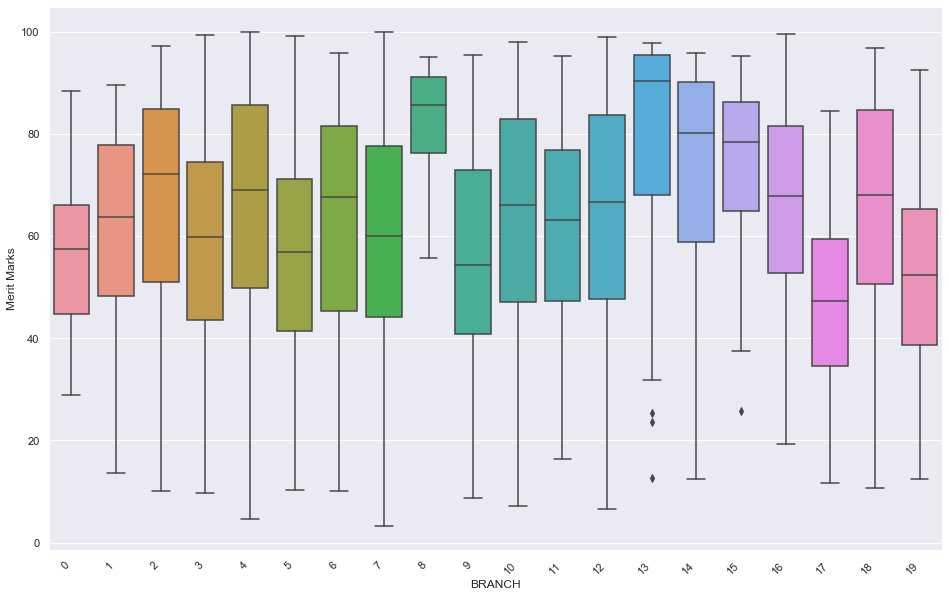

In [56]:
df=EDA_After_PP(df)
#df['College Name']
#df['College Code']

In [42]:
df["BRANCH"].isnull().sum(), df["BRANCH"].unique()
df['BRANCH'] = np.where(pd.isnull(df['BRANCH']), 'MECHANICAL', df['BRANCH'])

In [43]:
############### target variable = College Name or Branch, uncomment appropriately ###############
target_var = 'BRANCH'
#target_var = 'Branch'

df['Home University'] = np.where(pd.isnull(df['Home University']), 'PUNE', df['Home University'])
df['Category'] = np.where(pd.isnull(df['Category']), 'OPEN', df['Category'])
df['CAP Round'] = np.where(pd.isnull(df['CAP Round']), 'ROUND-1', df['CAP Round'])

df['Gender'] = np.where(pd.isnull(df['Gender']), 'M', df['Gender'])
df['NATIONALITY'] = np.where(pd.isnull(df['NATIONALITY']), 'INDIAN', df['NATIONALITY'])
df['Defence Type'] = np.where(pd.isnull(df['Defence Type']), 'NA', df['Defence Type'])
df['PH Type'] = np.where(pd.isnull(df['PH Type']), 'NA', df['PH Type'])
df['College Name'] = np.where(pd.isnull(df['College Name']), 'SINHGAD SKN', df['College Name'])
df['Candidate Type'] = np.where(pd.isnull(df['Candidate Type']), 'TYPE A', df['Candidate Type'])
df['College Code'] = np.where(pd.isnull(df['College Code']), 6178, df['College Code'])
df['Merit No'] = np.where(pd.isnull(df['Merit No']), 6000, df['Merit No'])
df['Merit Marks'] = np.where(pd.isnull(df['Merit Marks']), 50, df['Merit Marks'])

#df["Candidate Type"].isnull().sum(), df["Candidate Type"].unique()

#################################################################################################

In [44]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder() 
# Encode labels in column 'in all'. 
label_encoder = LabelEncoder() 
Home_University_label_encoder= LabelEncoder()
Gender_label_encoder=LabelEncoder()
Category_label_encoder=LabelEncoder()
Candidate_Type_label_encoder=LabelEncoder()
College_Name_label_encoder=LabelEncoder()
NATIONALITY_label_encoder=LabelEncoder()
Defence_Type_label_encoder=LabelEncoder()
CAP_Round_label_encoder=LabelEncoder()
PH_Type_label_encoder=LabelEncoder()
#Seat_Type_label_encoder=LabelEncoder()

# Encode labels in column 'in all'. 
df['Home University']= Home_University_label_encoder.fit_transform(df['Home University'])

df['Gender']= Gender_label_encoder.fit_transform(df['Gender'])

df['Category']= Category_label_encoder.fit_transform(df['Category'])

df['Candidate Type']= Candidate_Type_label_encoder.fit_transform(df['Candidate Type'])

#df['Seat Type']= Seat_Type_label_encoder.fit_transform(df['Candidate Type'])

df['College Name']=College_Name_label_encoder.fit_transform(df['College Name'])

df['NATIONALITY']=NATIONALITY_label_encoder.fit_transform(df['NATIONALITY'])

df['Defence Type']=Defence_Type_label_encoder.fit_transform(df['Defence Type'])

df['CAP Round']=CAP_Round_label_encoder.fit_transform(df['CAP Round'])

df['PH Type']= PH_Type_label_encoder.fit_transform(df['PH Type'])
#df['HSC Eligibility']= label_encoder.fit_transform(df['HSC Eligibility'])



In [45]:
df.head()

,College Name,College Code,Merit No,Merit Marks,Gender,Candidate Type,Category,Home University,PH Type,Defence Type,HSC Eligibility,CAP Round,BRANCH,NATIONALITY,HSC_binned,Merit_Marks_binned,temp_y
0,0,6278,18840.0,23.9385,1,5,5,4,0,4,80.00,6,2,0,Distinction,Fail,2
1,0,6278,54528.0,53.3348,1,5,2,9,0,4,70.83,6,2,0,First Class,Second Class,2
2,0,6278,33711.0,67.6209,1,5,4,9,0,4,61.67,6,2,0,First Class,First Class,2
3,0,6278,42315.0,61.3212,1,5,4,9,0,4,68.33,6,2,0,First Class,First Class,2
4,0,6278,21755.0,78.0387,1,5,5,9,0,4,58.00,6,2,0,Second Class,Distinction,2


In [46]:
df.drop(['BRANCH'], axis=1, inplace=True)
df.drop(['HSC_binned'], axis=1, inplace=True)
df.drop(['Merit_Marks_binned'], axis=1, inplace=True)
df.shape


(14083, 14)

In [47]:
# store column index and column names into the variables for feature selection
df_col_idx = [df.columns.get_loc(c) for c in df.columns.values if c in df]
df_col_name = list(df.columns.values)
print (df_col_name)
print (df_col_idx)
print(df.isnull().sum()) 

['College Name', 'College Code', 'Merit No', 'Merit Marks', 'Gender', 'Candidate Type', 'Category', 'Home University', 'PH Type', 'Defence Type', 'HSC Eligibility', 'CAP Round', 'NATIONALITY', 'temp_y']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
College Name       0
College Code       0
Merit No           0
Merit Marks        0
Gender             0
Candidate Type     0
Category           0
Home University    0
PH Type            0
Defence Type       0
HSC Eligibility    0
CAP Round          0
NATIONALITY        0
temp_y             0
dtype: int64


In [48]:

X=df.iloc[:,:len(df_col_idx)-1]    # predictors
y = df['temp_y']     # target variable
print("X:",X.shape)
print("y:",y.shape)


X: (14083, 13)
y: (14083,)


In [49]:
# Split dataset into train and test dataset
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(9858, 13)
(4225, 13)


In [50]:
df.head()

,College Name,College Code,Merit No,Merit Marks,Gender,Candidate Type,Category,Home University,PH Type,Defence Type,HSC Eligibility,CAP Round,NATIONALITY,temp_y
0,0,6278,18840.0,23.9385,1,5,5,4,0,4,80.00,6,0,2
1,0,6278,54528.0,53.3348,1,5,2,9,0,4,70.83,6,0,2
2,0,6278,33711.0,67.6209,1,5,4,9,0,4,61.67,6,0,2
3,0,6278,42315.0,61.3212,1,5,4,9,0,4,68.33,6,0,2
4,0,6278,21755.0,78.0387,1,5,5,9,0,4,58.00,6,0,2


In [51]:
#import StandardScale` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [105]:
# one hot encode outputs for NN
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

Using TensorFlow backend.


20


In [ ]:
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(13,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# build the model
model.fit(X_train, y_train, epochs=500)

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

LR: 0.316901 (0.015738)
SVM: 0.336885 (0.014885)
DTreeC: 0.388010 (0.011808)
RF: 0.459223 (0.013409)
NB: 0.043619 (0.006413)
KNN: 0.308783 (0.018557)


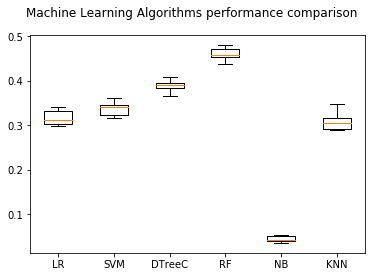

In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

models_list = []

models_list.append(('LR', LogisticRegression(max_iter=1000)))
models_list.append(('SVM', SVC()))
models_list.append(('DTreeC', DecisionTreeClassifier()))
models_list.append(('RF', RandomForestClassifier(n_estimators=300, max_features=3)))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

results = []
algo_names = []

for name, model in models_list:
    kfold = KFold(n_splits=10, random_state=2019)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cross_val_results)
    algo_names.append(name)
    info = "%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(info)

fig = plt.figure()
fig.suptitle('Machine Learning Algorithms performance comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(algo_names)
plt.show()



In [ ]:
# Feature selection based on top f_classifier
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = len(df_col_idx)-1)
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)


In [ ]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)


In [ ]:
print("feat_importances" %feat_importances)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [ ]:
# using Recursive Features Importance
from sklearn.feature_selection import RFE

# feature extraction
model = LogisticRegression(max_iter=1000)
#model = LinearDiscriminantAnalysis()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Feature Support: %s" % fit.support_)
feat_rank = fit.ranking_
print("Feature Ranking: %s" % feat_rank)
feat_selected = [(df.columns[i]) for i in range(feat_rank.size) if feat_rank[i] == 1]
feat_selected_idx = [i for i in range(feat_rank.size) if feat_rank[i] == 1]
print("Selected Features: %s" % feat_selected)
print("Selected Features Index: %s" % feat_selected_idx)


In [59]:
#Logistic

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

y_train_pred=logmodel.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=logmodel.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

from sklearn.metrics import classification_report
report=classification_report(y_test,predictions)
print("\n\nClassification Report:\n",report)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
print("\nConfusion Matrix:\n",cm)

accuracy=accuracy_score(y_test,predictions)
print("\nAccuracy:",accuracy)

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,predictions,margins=True,rownames=['Actual'],colnames=['Prediction']))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Train Results...     Accuracy :  0.3167120304844856

Test Results...      Accuracy :  0.31496062992125984


Classification Report:
                        precision    recall  f1-score   support

           AUTOMOBILE       0.14      0.91      0.24        11
       BIO TECHNOLOGY       0.00      0.00      0.00        19
             CHEMICAL       0.00      0.00      0.00        55
                CIVIL       0.17      0.06      0.09       381
             COMPUTER       0.31      0.31      0.31       818
           ELECTRICAL       0.00      0.00      0.00       125
          ELECTRONICS       0.00      0.00      0.00        37
                 ENTC       0.33      0.26      0.29       784
           INDUSTRIAL       0.00      0.00      0.00        11
      INSTRUMENTATION       0.00      0.00      0.00        50
                   IT       0.00      0.00      0.00       433
      MECH (SANDWICH)       0.00      0.00      0.00        26
           MECHANICAL       0.33      0.71    

In [60]:
# linear SVM classifier

#It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC 

svm_model_linear = SVC(kernel = 'linear', C = 1)
svm_model_linear.fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

y_train_pred=svm_model_linear.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=svm_model_linear.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Train Results...     Accuracy :  0.30767555797495916

Test Results...      Accuracy :  0.31191262382524765


confusion marix :
[[  0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0
    0   0]
 [  0   0   0   0   6   0   0   7   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   0   0   0   6   0   0   1   0   0   0   0  48   0   0   0   0   0
    0   0]
 [  0   0   0   6  24   0   0  20   0   0   0   0 331   0   0   0   0   0
    0   0]
 [  0   0   0   4 218   0   0  63   0   0   0   0 533   0   0   0   0   0
    0   0]
 [  0   0   0   0  13   0   0  13   0   0   0   0  99   0   0   0   0   0
    0   0]
 [  0   0   0   0   7   0   0   3   0   0   0   0  27   0   0   0   0   0
    0   0]
 [  0   0   0   2 164   0   0  87   0   0   0   0 531   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0  10   0   0   0   0   0
    0   0]
 [  0   0   0   0   4   0   0   4   0   0   0   0  42   0   0   0   0   0
    0   0]
 [  0   0   0   1 120

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

           AUTOMOBILE       0.00      0.00      0.00        11
       BIO TECHNOLOGY       0.00      0.00      0.00        19
             CHEMICAL       0.00      0.00      0.00        55
                CIVIL       0.32      0.02      0.03       381
             COMPUTER       0.32      0.27      0.29       818
           ELECTRICAL       0.00      0.00      0.00       125
          ELECTRONICS       0.00      0.00      0.00        37
                 ENTC       0.32      0.11      0.16       784
           INDUSTRIAL       0.00      0.00      0.00        11
      INSTRUMENTATION       0.00      0.00      0.00        50
                   IT       0.00      0.00      0.00       433
      MECH (SANDWICH)       0.00      0.00      0.00        26
           MECHANICAL       0.31      0.88      0.46      1048
 MECHANICAL[SANDWICH]       0.00      0.00      0.00        11
       PETRO CHEMICAL       0.00      0.00      0.00  

In [61]:
# Decision Tree Classifier

#The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=2019)
clf.fit(X_train,y_train)

print('\n\nFeature Importances :', clf.feature_importances_)

y_train_pred=clf.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=clf.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))


print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Feature Importances : [0.35007214 0.43338112 0.09086102 0.07179808 0.02149973 0.
 0.         0.0008134  0.         0.         0.00805853 0.02351599
 0.         0.        ]


Train Results...     Accuracy :  0.3780076211213936

Test Results...      Accuracy :  0.3317246634493269


confusion marix :
[[  0   0   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   5   0   0   3   0   0   0   0  11   0   0   0   0   0
    0   0]
 [  0   0   0   0  11   0   6  17   0   0   0   0  21   0   0   0   0   0
    0   0]
 [  0   0   0  88  61   0   0  44   0   0  12   0 174   0   0   0   0   0
    0   2]
 [  0   0   0  50 231   0   2 107   0   0  31   0 396   0   0   0   1   0
    0   0]
 [  0   0   0  11  31   1   0  26   0   0   0   0  55   0   0   0   0   1
    0   0]
 [  0   0   0   0  13   0   9  15   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  24 129   1  10 214   0   0  15   0 374   0   0   0  12   4
    0   1]
 [  0   0   0   0  

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       precision    recall  f1-score   support

           AUTOMOBILE       0.00      0.00      0.00        11
       BIO TECHNOLOGY       0.00      0.00      0.00        19
             CHEMICAL       0.00      0.00      0.00        55
                CIVIL       0.27      0.23      0.25       381
             COMPUTER       0.30      0.28      0.29       818
           ELECTRICAL       0.17      0.01      0.02       125
          ELECTRONICS       0.20      0.24      0.22        37
                 ENTC       0.35      0.27      0.31       784
           INDUSTRIAL       0.00      0.00      0.00        11
      INSTRUMENTATION       0.00      0.00      0.00        50
                   IT       0.12      0.03      0.05       433
      MECH (SANDWICH)       0.00      0.00      0.00        26
           MECHANICAL       0.36      0.70      0.48      1048
 MECHANICAL[SANDWICH]       0.00      0.00      0.00        11
       PETRO CHEMICAL       0.00      0.00      0.00  

In [27]:
# Random Forest

#Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

num_trees = 10
n_jobs = -1 

rd = RandomForestClassifier(n_estimators=num_trees,max_leaf_nodes=7,n_jobs=n_jobs,random_state=2019)
rd.fit(X_train, y_train)
y_pred=rd.predict(X_test)
print('\n\nFeature Importances :', rd.feature_importances_)

y_train_pred=rd.predict(X_train)
print('\n\nTrain Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))

y_test_pred=rd.predict(X_test)
print('\nTest Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))

print('\n\nconfusion marix :')
print(confusion_matrix(y_test,y_test_pred))
print('\n\nClassification Reports :')
print(classification_report(y_test,y_test_pred))

print('\n\nConfusion matrix using Crosstab :')
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))



Feature Importances : [0.16085969 0.32402784 0.07812054 0.09140929 0.10414988 0.
 0.         0.01419258 0.         0.         0.0072727  0.21996747
 0.        ]


Train Results...     Accuracy :  0.27612091702170827

Test Results...      Accuracy :  0.27005917159763315


confusion marix :
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Classification Reports :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00        77
           6       0.00      0.00      0.00        26
           7       0.00      0.00      0.00        53
           8       0.00      0.00     

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction  10  15    22  23   25    35   37   All
Actual                                            
0            0   0     7   0    0     0    0     7
1            0   0     4   0    3    15    0    22
2            0   0    19   0    0     4    0    23
3            0   0     3   0    0     3    0     6
4            0   0    17   0    0    16    0    33
5            0   0    19   0   32    26    0    77
6            0   0    20   0    0     6    0    26
7            0   0    19   8    0    26    0    53
8            0   0     2   0    0     1    0     3
9            0   0    10   0    0     7    0    17
10           2   0     8   0   25    26   50   111
11           0   0     3   0    6     3    0    12
12           0   0    23   0    6    21    0    50
13           0   0   332   0    1   199    0   532
14           0   0     8   0    0     1    0     9
15           0   8    28   0   44    44   43   167
16           0   0     7   0    0     1    0     8
17           0   0    45   0   

In [63]:
# Naive Bayes

#It predicts membership probabilities for each class such as the probability that given record or data point belongs to a particular class. 
#It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

num_folds=10

kfold=StratifiedKFold(n_splits=num_folds,random_state=2019)


gnb_clf=GaussianNB()
gnb_clf.fit(X_train,y_train)
results=cross_val_score(gnb_clf,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean())


y_train_pred=gnb_clf.predict(X_train)
print("Train------ Accuracy:",accuracy_score(y_train,y_train_pred))


y_test_pred=gnb_clf.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))

CV-Accuracy: 0.032010734411041644
Train------ Accuracy: 0.030484485574305935
Test------ Accuracy: 0.30962661925323853


In [64]:
# KNN

#Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

k=7

knn_clf=KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train,y_train)

results=cross_val_score(knn_clf,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean())


y_train_pred=knn_clf.predict(X_train)
print("Train------ Accuracy:",accuracy_score(y_train,y_train_pred))


y_test_pred=knn_clf.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))


CV-Accuracy: 0.3217244992544231
Train------ Accuracy: 0.4889493739793141
Test------ Accuracy: 0.33807467614935227


In [53]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

num_trees=100
num_folds=5

kfold=StratifiedKFold(n_splits=10,random_state=41)

xgb_clf = XGBClassifier(n_estimators=175,seed=41)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test,y_test)],verbose=1)
results=cross_val_score(xgb_clf,X_train,y_train,cv=kfold)
print("\n XGBoost--CV.Train :%.2f" % results.mean())
y_train_pred=xgb_clf.predict(X_train)

y_train_pred_proba = xgb_clf.predict_proba(X_train)
y_test_pred_proba = xgb_clf.predict_proba(X_test)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

def getbestThree(y_prob):
    branches = pd.DataFrame(columns = ["F_Preference","S_Preference", "T_Preference"], index = range(0,len(y_prob)))
    
    for i in range(0, len(y_prob)):
        top_3_idx = np.argsort(y_prob[i])[-3:]
        branches.iloc[i][0] = branch_names[top_3_idx[2]]
        branches.iloc[i][1] = branch_names[top_3_idx[1]]
        branches.iloc[i][2] = branch_names[top_3_idx[0]]
                 
    return branches

def predict(original, suggested, predicted):
    for i in range(0, len(original)):
        if(branch_names[original.iloc[i]] in suggested.iloc[i,:].values):
            predicted[i] = original.iloc[i]
        else:
            predicted[i] = predicted[i]
        
    return predicted
          
y_train_suggested = getbestThree(y_train_pred_proba)
y_test_suggested = getbestThree(y_test_pred_proba)

y_train_pred = predict(y_train, y_train_suggested, y_train_pred)
y_test_pred = predict(y_test, y_test_suggested, y_test_pred)

print('Train Results...     Accuracy : ',accuracy_score(y_train,y_train_pred))
print('Test Results...      Accuracy : ',accuracy_score(y_test,y_test_pred))
print(pd.crosstab(y_test,y_test_pred,margins=True,rownames=['Actual'],colnames=['Prediction']))

[0]	validation_0-merror:0.61183
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.59266
[2]	validation_0-merror:0.59314
[3]	validation_0-merror:0.58675
[4]	validation_0-merror:0.58130
[5]	validation_0-merror:0.56947
[6]	validation_0-merror:0.56923
[7]	validation_0-merror:0.56284
[8]	validation_0-merror:0.55953
[9]	validation_0-merror:0.55811
[10]	validation_0-merror:0.55408
[11]	validation_0-merror:0.55290
[12]	validation_0-merror:0.55314
[13]	validation_0-merror:0.55053
[14]	validation_0-merror:0.55077
[15]	validation_0-merror:0.54911
[16]	validation_0-merror:0.54698
[17]	validation_0-merror:0.54556
[18]	validation_0-merror:0.54556
[19]	validation_0-merror:0.54367
[20]	validation_0-merror:0.54248
[21]	validation_0-merror:0.53988
[22]	validation_0-merror:0.53799
[23]	validation_0-merror:0.53775
[24]	validation_0-merror:0.53562
[25]	validation_0-merror:0.53278
[26]	validation_0-merror:0.53302
[27]	validation_0-merror:0.53278
[28]	validation_0-m

In [195]:
y_train_suggested

,F_Preference,S_Preference,T_Preference
0,MECHANICAL,COMPUTER,IT
1,MECHANICAL,CIVIL,IT
2,COMPUTER,ENTC,MECHANICAL
3,ENTC,MECHANICAL,COMPUTER
4,COMPUTER,MECHANICAL,ENTC
...,...,...,...
9853,ENTC,COMPUTER,PETRO CHEMICAL
9854,COMPUTER,ENTC,IT
9855,MECHANICAL,COMPUTER,ELECTRICAL
9856,MECHANICAL,COMPUTER,IT


In [107]:
#College Name', 'College Code', 'Merit No', 'Merit Marks', 'Gender','Candidate Type', 'Category', 'Home University', 'PH Type', 'Defence Type', 'HSC Eligibility', 'CAP Round', 'NATIONALITY',
#'PICT', 6271
#'DY PATIL AK', 6272
# 'VIT, PUNE', 6273
#'PVG CET', 6274
#'BVCE, KATRAJ',6285
#"MAEERS M.I.T COLLEGE OF ENGINEERING",'M.I.T COE',6148

In [34]:
test_record=['PICT', 6271, 38,  76.4, 'M','OMS', 'OPEN', 'OHU', 'NA', 'NA', 77, 'IL', 'INDIAN']
test_record[0]=College_Name_label_encoder.transform([test_record[0]])[0]             
test_record[4]=Gender_label_encoder.transform([test_record[4]])[0]
test_record[5]=Candidate_Type_label_encoder.transform([test_record[5]])[0]
test_record[6]=Category_label_encoder.transform([test_record[6]])[0]
test_record[7]=Home_University_label_encoder.transform([test_record[7]])[0]
test_record[8]=PH_Type_label_encoder.transform([test_record[8]])[0]
test_record[9]=Defence_Type_label_encoder.transform([test_record[9]])[0]
#test_record[11]=Seat_Type_label_encoder.transform([test_record[11]])[0]             
test_record[11]=CAP_Round_label_encoder.transform([test_record[11]])[0]
test_record[12]=NATIONALITY_label_encoder.transform([test_record[12]])[0]
test_record

[18, 6271, 38, 76.4, 1, 3, 5, 8, 0, 4, 77, 2, 0]

In [35]:
standarize_new_record=standard_scaler.transform([test_record])
standarize_new_record

array([[ 0.40828018,  0.27751728, -0.35585658,  0.61919584,  0.56977532,
        -2.29453913,  0.07930691,  0.02632562, -0.03887569,  0.14462149,
         0.57404939, -1.04626811, -0.07825407]])

In [36]:
newrecord_pred_proba = xgb_clf.predict_proba(standarize_new_record)

In [37]:
getbestThree(newrecord_pred_proba)

,F_Preference,S_Preference,T_Preference
0,ENTC,IT,COMPUTER


[Text(0, 0, 'INFORMATION TECHNOLOGY'),
 Text(0, 0, 'COMPUTER ENGINEERING'),
 Text(0, 0, 'MECHANICAL ENGINEERING'),
 Text(0, 0, 'ELECTRONICS AND TELTCOMMNICATION ENGG'),
 Text(0, 0, 'ELECTRONICS AND TELECOMUNICATION ENGG')]

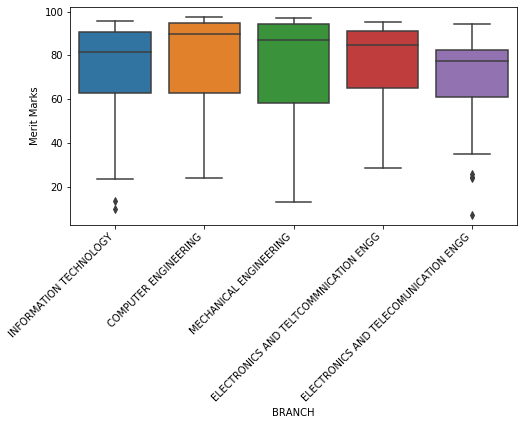

In [33]:
df1['Merit Marks']=df['Merit Marks']
df3 = pd.DataFrame(df1,columns =['College Name', 'Merit Marks','BRANCH']) 
df3.set_index("College Name", inplace = True) 
result = df3.loc['MAEERS M.I.T COLLEGE OF ENGINEERING'] 

plt.figure(figsize = (8,4))
chart=sns.boxplot( x = 'BRANCH', y = 'Merit Marks', data = result)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
    